## **Trabajo Práctico Grupal: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5571__
____


- Nombre: Nicolás
- Apellido: Paikovsky
- Legajo: 177.981-3

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

__Introducción__: La Telco NN les pidió que los ayuden a predecir que clientes dejarán la compañía. Para ellos se les presentará un dataset con una cartera de clientes de 7.043 personas con 21 variables que muestran algunas características de los clientes en la empresa.

#### Variables:
 - Customer ID:	Valor identificador de clientes
 - gender:	Género del cliente
 - SeniorCitizien:	Si el cliente es un SeniorCitizien o no
 - Partner:	Si el cliente tiene un socio o no
 - Dependents:	Si el cliente tiene dependientes o no
 - tenure:	Antigüedad del cliente
 - PhoneService:	Si el cliente tiene un servicio de telefono o no
 - MultipleLines:	Si el cliente tiene multiples lineas o no
 - InternetService:	Tipo de servicio de internet que recibe. Si es que recibe
 - OnlineSecurity:	Si el cliente tiene un servicio de seguridad online o no
 - OnlineBackup:	Si el cliente tiene un servicio de backup o no.
 - DeviceProtection:	Si el cliente tiene un seguro del dispositivo o no
 - TechSupport:	Si el cliente tiene soporte de tecnología o no.
 - StreamingTV:	Si el cliente tiene servicio de streaming o no
 - StreamingMovies:	Si el cliente tiene servicios de streaming de peliculas o no
 - Contract:	Tipo de contrato del cliente
 - PaperlessBilling:	Si el cliente recibe la factura en papel o no.
 - PaymentMethod:	Tipo de pago del cliente
 - MonthlyCharges:	Costo mensual
 - TotalCharges:	Cargos totales
 - Churn:	Si el cliente se fue de la compañía o no 


In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Primero importar:

 - el dataset
 - corroborar que lo hayamos cargado correctamente.

In [2]:
pwd #para saber donde estoy parado

'C:\\Users\\Usuario\\ENTREGA FINAL'

In [3]:
#cargar el dataset y mostrar los primeros valores con .head() para corroborar los datos
telco_df = pd.read_csv('./telco_churn_clusterai.csv', delimiter=',',encoding='latin-1')
telco_df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [4]:
# Usando np.shape podemos ver las dimensiones del dataset, nos dice que tiene 7043 renglones y 22 columnas
print("El dataset importado tiene "+ str(np.shape(telco_df)[0]) + " renglones y " + str(np.shape(telco_df)[1]) + " columnas")

El dataset importado tiene 7043 renglones y 22 columnas


In [5]:
# Elimino la columna 'Unnamed: 0' y 'customerID' y lo guardo en un nuevo dataframe, mostrando las dimensiones para asegurarnos el cambio.
telco_df = telco_df.drop(['Unnamed: 0', 'customerID'],axis=1)
np.shape(telco_df)

(7043, 20)

In [6]:
# Saco la informacion de como esta formado mi dataset (cuantos valores son nulos, tipo de variable y cantidad de columnas/filas)
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6127 non-null   object 
 1   SeniorCitizen     6127 non-null   float64
 2   Partner           6127 non-null   object 
 3   Dependents        6127 non-null   object 
 4   tenure            6127 non-null   float64
 5   PhoneService      6127 non-null   object 
 6   MultipleLines     6127 non-null   object 
 7   InternetService   6127 non-null   object 
 8   OnlineSecurity    6127 non-null   object 
 9   OnlineBackup      6127 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          5846 non-null   object 
 15  PaperlessBilling  5846 non-null   object 
 16  PaymentMethod     5846 non-null   object 


In [7]:
# La columna 'TotalCharges' deberia ser un float porque estamos viendo el cargo total de servicio, asi que vamos a cambiar el tipo de dato
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce' ) # Si encuentra un valor que no puede convertir (ej: ' '), lo cambia a NaN

In [8]:
# Es una columna binaria 1/0 entonces la voy a pasar a Int64
telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].astype('Int64')

In [9]:
# Obtenemos algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros.
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6127.0,6127.000000,5846.000000,7032.000000
mean,0.16158,32.539742,64.658655,2283.300441
std,0.368095,24.629822,30.046041,2266.771362
min,0.0,0.000000,18.700000,18.800000
25%,0.0,9.000000,35.400000,401.450000
50%,0.0,29.000000,70.375000,1397.475000
75%,0.0,56.000000,89.687500,3794.737500
max,1.0,72.000000,118.750000,8684.800000


In [10]:
# Eliminamos las filas que no tienen valores en totalCharges ya que son clientes que todavia no llegaron a la primera facturacion
print(f"Dimensiones antes de limpiar: {telco_df.shape}")
telco_df = telco_df.dropna(subset=['TotalCharges'])
print(f"Dimensiones después de limpiar: {telco_df.shape}")

Dimensiones antes de limpiar: (7043, 20)
Dimensiones después de limpiar: (7032, 20)


In [11]:
# Revisamos cuales son los valores en cada variable
for column in telco_df.columns:
    print(column,len(telco_df[column].unique()),telco_df[column].unique()) #con uniqu podemos ver todos los valores que puede tener la variable

gender 3 ['Female' 'Male' nan]
SeniorCitizen 3 <IntegerArray>
[<NA>, 0, 1]
Length: 3, dtype: Int64
Partner 3 ['Yes' 'No' nan]
Dependents 3 ['No' nan 'Yes']
tenure 73 [ 1. 34.  2. nan  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 47. 72. 17. 27.  5. 46. 11. 70. 43. 60. 18. 63. 66.  9.  3. 31. 50. 64.
 56. 30. 45.  7. 42. 35. 48. 29. 12. 38. 32. 55. 37. 36. 41.  6.  4. 33.
 23. 57. 61. 65. 20. 53. 14. 15. 40. 59. 24. 44. 19. 54. 51. 67. 68. 26.
 39.]
PhoneService 3 ['No' 'Yes' nan]
MultipleLines 4 ['No phone service' 'No' nan 'Yes']
InternetService 4 ['DSL' nan 'Fiber optic' 'No']
OnlineSecurity 4 ['No' 'Yes' nan 'No internet service']
OnlineBackup 4 ['Yes' 'No' nan 'No internet service']
DeviceProtection 3 ['No' 'Yes' 'No internet service']
TechSupport 3 ['No' 'Yes' 'No internet service']
StreamingTV 3 ['No' 'Yes' 'No internet service']
StreamingMovies 3 ['No' 'Yes' 'No internet service']
Contract 4 ['Month-to-month' 'One year' nan 'Two year']
PaperlessBilling 3 [nan 'No' 'Ye

In [12]:
# Elimino la columna 'gender', 'dependents' y 'PaperlessBilling' ya que presentan valores NaN y consideramos que no son relevantes para el modelo en este momento y lo guardo en un nuevo dataframe, mostrando las dimensiones para asegurarnos el cambio.
telco_df = telco_df.drop(['gender', 'Dependents','PaperlessBilling'],axis=1)
np.shape(telco_df)

(7032, 17)

____
Vamos a buscar reducir la cantidad de valores NaN en las diferentes columnas asi no se pierden demasiado registros.
____

Comenzaremos por identificar y agregar si el cliente tiene servicio de telefonia o no:
 - Cuando el valor de servicio es nulo pero se indica que tiene multiples lineas -  Resultado es 'Yes'
 - Cuando el valor de servicio es nulo pero se indica que no tiene servicio de telefonia - Resultado es 'No'

In [13]:
# Identificar las filas que cumplen AMBAS condiciones:
#    a) 'PhoneService' es NaN
#    b) 'MultipleLines' es 'Yes'
condicion = (telco_df['PhoneService'].isna()) & (telco_df['MultipleLines'] == 'Yes')

# Usar .loc para actualizar 'PhoneService' a 'Yes' solo en esas filas
telco_df.loc[condicion, 'PhoneService'] = 'Yes'

In [14]:
#    a) 'PhoneService' es NaN
#    b) 'MultipleLines' es 'No phone service'
condicion = (telco_df['PhoneService'].isna()) & (telco_df['MultipleLines'] == 'No phone service')
telco_df.loc[condicion, 'PhoneService'] = 'No'

In [15]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6117 non-null   Int64  
 1   Partner           6117 non-null   object 
 2   tenure            6117 non-null   float64
 3   PhoneService      6539 non-null   object 
 4   MultipleLines     6118 non-null   object 
 5   InternetService   6118 non-null   object 
 6   OnlineSecurity    6116 non-null   object 
 7   OnlineBackup      6116 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          5836 non-null   object 
 13  PaymentMethod     5838 non-null   object 
 14  MonthlyCharges    5836 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   object 
dtype

Dentro del mismo punto, si el valor de Multiples Lineas es nulo y no hay servicio telefonico entonces el resultado es No.
Remplazaremos donde haya 'No phone service' por 'No'

In [16]:
#    a) 'MultipleLines' es NaN
#    b) 'PhoneService' es 'No'
condicion = (telco_df['MultipleLines'].isna()) & (telco_df['PhoneService'] == 'No')
telco_df.loc[condicion, 'MultipleLines'] = 'No'

# Remplaza todos los valores 'No phone service' por 'No' en la columna 'MultipleLines'
telco_df['MultipleLines'] = telco_df['MultipleLines'].replace('No phone service', 'No')

In [17]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6117 non-null   Int64  
 1   Partner           6117 non-null   object 
 2   tenure            6117 non-null   float64
 3   PhoneService      6539 non-null   object 
 4   MultipleLines     6193 non-null   object 
 5   InternetService   6118 non-null   object 
 6   OnlineSecurity    6116 non-null   object 
 7   OnlineBackup      6116 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          5836 non-null   object 
 13  PaymentMethod     5838 non-null   object 
 14  MonthlyCharges    5836 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   object 
dtype

Siguiente paso a identificar si el cliente tiene servicio de internet o no:
 - Cuando el valor de servicio es nulo pero se indica que no tiene servicio en TechSupport -  Resultado es 'No'
 - Cuando el valor de servicio es nulo pero se indica que tiene servicio backup o seguridad - Resultado es 'Unknown' porque no podemos saber que tipo de servicio tiene

In [18]:
#    a) 'InternetService' es NaN
#    b) 'TechSupport' es 'No internet service'
condicion = (telco_df['InternetService'].isna()) & (telco_df['TechSupport'] == 'No internet service')
telco_df.loc[condicion, 'InternetService'] = 'No'

In [19]:
#    a) 'InternetService' es NaN
#    b) 'OnlineBackup' es 'Yes'
condicion = (telco_df['InternetService'].isna()) & (telco_df['OnlineBackup'] == 'Yes')
telco_df.loc[condicion, 'InternetService'] = 'Unknown'

In [20]:
#    a) 'InternetService' es NaN
#    b) 'OnlineSecurity' es 'Yes'
condicion = (telco_df['InternetService'].isna()) & (telco_df['OnlineSecurity'] == 'Yes')
telco_df.loc[condicion, 'InternetService'] = 'Unknown'

In [21]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6117 non-null   Int64  
 1   Partner           6117 non-null   object 
 2   tenure            6117 non-null   float64
 3   PhoneService      6539 non-null   object 
 4   MultipleLines     6193 non-null   object 
 5   InternetService   6695 non-null   object 
 6   OnlineSecurity    6116 non-null   object 
 7   OnlineBackup      6116 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          5836 non-null   object 
 13  PaymentMethod     5838 non-null   object 
 14  MonthlyCharges    5836 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   object 
dtype

Dentro del mismo punto, si el valor de OnlineSecurity/OnlineBackup es nulo y no hay servicio de internet entonces el resultado es No.
Remplazaremos donde haya 'No phone service' por 'No'

In [22]:
#    a) 'OnlineSecurity' es NaN
#    b) 'TechSupport' es 'No internet service'
condicion = (telco_df['OnlineSecurity'].isna()) & (telco_df['TechSupport'] == 'No internet service')
telco_df.loc[condicion, 'OnlineSecurity'] = 'No'

In [23]:
#    a) 'OnlineBackup' es NaN
#    b) 'TechSupport' es 'No internet service'
condicion = (telco_df['OnlineBackup'].isna()) & (telco_df['TechSupport'] == 'No internet service')
telco_df.loc[condicion, 'OnlineBackup'] = 'No'

In [24]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6117 non-null   Int64  
 1   Partner           6117 non-null   object 
 2   tenure            6117 non-null   float64
 3   PhoneService      6539 non-null   object 
 4   MultipleLines     6193 non-null   object 
 5   InternetService   6695 non-null   object 
 6   OnlineSecurity    6310 non-null   object 
 7   OnlineBackup      6294 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          5836 non-null   object 
 13  PaymentMethod     5838 non-null   object 
 14  MonthlyCharges    5836 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   object 
dtype

Siguiente paso es rellenar los valores de 'tenure' y 'MonthlyCharges':
 - MonthlyCharges se puede obtener si tenemos totalCharges y tenure
 - tenure se puede obtener si tenemos totalCharges y MonthlyCharges

In [25]:
# Si MonthlyCharges es NaN, Y TotalCharges NO es NaN, Y tenure NO es NaN y es mayor que 0
condicion_monthly = (telco_df['MonthlyCharges'].isna()) & \
                    (telco_df['TotalCharges'].notna()) & \
                    (telco_df['tenure'].notna()) & \
                    (telco_df['tenure'] > 0) # Evitar división por cero

telco_df.loc[condicion_monthly, 'MonthlyCharges'] = telco_df['TotalCharges'] / telco_df['tenure']

In [26]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6117 non-null   Int64  
 1   Partner           6117 non-null   object 
 2   tenure            6117 non-null   float64
 3   PhoneService      6539 non-null   object 
 4   MultipleLines     6193 non-null   object 
 5   InternetService   6695 non-null   object 
 6   OnlineSecurity    6310 non-null   object 
 7   OnlineBackup      6294 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          5836 non-null   object 
 13  PaymentMethod     5838 non-null   object 
 14  MonthlyCharges    6875 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   object 
dtype

In [27]:
# Si tenure es NaN, Y TotalCharges NO es NaN, Y MonthlyCharges NO es NaN y es mayor que 0
condicion_tenure = (telco_df['tenure'].isna()) & \
                   (telco_df['TotalCharges'].notna()) & \
                   (telco_df['MonthlyCharges'].notna()) & \
                   (telco_df['MonthlyCharges'] > 0) # Evitar división por cero

telco_df.loc[condicion_tenure, 'tenure'] = (telco_df['TotalCharges'] / telco_df['MonthlyCharges']).round().astype(int, errors='ignore')

In [28]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6117 non-null   Int64  
 1   Partner           6117 non-null   object 
 2   tenure            6875 non-null   float64
 3   PhoneService      6539 non-null   object 
 4   MultipleLines     6193 non-null   object 
 5   InternetService   6695 non-null   object 
 6   OnlineSecurity    6310 non-null   object 
 7   OnlineBackup      6294 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          5836 non-null   object 
 13  PaymentMethod     5838 non-null   object 
 14  MonthlyCharges    6875 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   object 
dtype

Completamos y remplazamos valores nulos por No en el resto de las columnas.

In [29]:
for column in ['Partner', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup']:
    telco_df[column] = telco_df[column].fillna('No')
for column in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    telco_df[column] = telco_df[column].replace('No internet service', 'No')
telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].fillna(0)

In [30]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   Int64  
 1   Partner           7032 non-null   object 
 2   tenure            6875 non-null   float64
 3   PhoneService      6539 non-null   object 
 4   MultipleLines     7032 non-null   object 
 5   InternetService   6695 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          5836 non-null   object 
 13  PaymentMethod     5838 non-null   object 
 14  MonthlyCharges    6875 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   object 
dtype

Ya que no tenemos forma de completar el resto de los valores de tenure y monthlyCharges, eliminamos las filas incompletas.

In [31]:
print(f"Dimensiones antes de limpiar: {telco_df.shape}")
telco_df = telco_df.dropna(subset=['MonthlyCharges'])
print(f"Dimensiones después de limpiar: {telco_df.shape}")

Dimensiones antes de limpiar: (7032, 17)
Dimensiones después de limpiar: (6875, 17)


Para aquellos valores nulos en PhoneService y en InternetService, aplicaremos las siguientes condiciones:
 - Si PhoneService es nulo pero InternetService no lo es - Asumiremos que no hay servicio telefonico
 - Si InternetService es nulo pero PhoneService no lo es - Asumiremos que no hay servicio de internet

In [32]:
#    a) 'PhoneService' es NaN
#    b) 'InternetService' NO es NaN (es decir, tiene algún valor)
condicion = (telco_df['PhoneService'].isna()) & (telco_df['InternetService'].notna())

telco_df.loc[condicion, 'PhoneService'] = 'No'

In [33]:
#    a) 'InternetService' es NaN
#    b) 'PhoneService' NO es NaN (es decir, tiene algún valor)
condicion = (telco_df['InternetService'].isna()) & (telco_df['PhoneService'].notna())

telco_df.loc[condicion, 'InternetService'] = 'No'

In [34]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6875 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6875 non-null   Int64  
 1   Partner           6875 non-null   object 
 2   tenure            6875 non-null   float64
 3   PhoneService      6842 non-null   object 
 4   MultipleLines     6875 non-null   object 
 5   InternetService   6842 non-null   object 
 6   OnlineSecurity    6875 non-null   object 
 7   OnlineBackup      6875 non-null   object 
 8   DeviceProtection  6875 non-null   object 
 9   TechSupport       6875 non-null   object 
 10  StreamingTV       6875 non-null   object 
 11  StreamingMovies   6875 non-null   object 
 12  Contract          5702 non-null   object 
 13  PaymentMethod     5712 non-null   object 
 14  MonthlyCharges    6875 non-null   float64
 15  TotalCharges      6875 non-null   float64
 16  Churn             6875 non-null   object 
dtype

In [35]:
# Completamos los valores nulos para contratos y metodos de pagos
telco_df.loc[telco_df['Contract'].isna(), 'Contract'] = 'Unknown'
telco_df.loc[telco_df['PaymentMethod'].isna(), 'PaymentMethod'] = 'Unknown'

In [36]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6875 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6875 non-null   Int64  
 1   Partner           6875 non-null   object 
 2   tenure            6875 non-null   float64
 3   PhoneService      6842 non-null   object 
 4   MultipleLines     6875 non-null   object 
 5   InternetService   6842 non-null   object 
 6   OnlineSecurity    6875 non-null   object 
 7   OnlineBackup      6875 non-null   object 
 8   DeviceProtection  6875 non-null   object 
 9   TechSupport       6875 non-null   object 
 10  StreamingTV       6875 non-null   object 
 11  StreamingMovies   6875 non-null   object 
 12  Contract          6875 non-null   object 
 13  PaymentMethod     6875 non-null   object 
 14  MonthlyCharges    6875 non-null   float64
 15  TotalCharges      6875 non-null   float64
 16  Churn             6875 non-null   object 
dtype

Ahora que tenemos casi todas las columas actualizadas podemos hacer la ultima eliminacion de filas respecto a la data faltante para servicio telefonico y de internet.

In [37]:
print(f"Dimensiones antes de limpiar: {telco_df.shape}")
telco_df = telco_df.dropna(subset=['PhoneService'])
print(f"Dimensiones después de limpiar: {telco_df.shape}")

Dimensiones antes de limpiar: (6875, 17)
Dimensiones después de limpiar: (6842, 17)


In [38]:
for column in telco_df.columns:
    print(column,len(telco_df[column].unique()),telco_df[column].unique()) #con unique podemos ver todos los valores que puede tener la variable

SeniorCitizen 2 <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
Partner 2 ['Yes' 'No']
tenure 75 [ 1. 34.  2. 44.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 47. 72. 17. 27.  5. 11. 70. 43. 14. 60. 18. 63. 66.  9.  3. 31. 50. 64.
 56. 46. 30. 45.  7. 42. 35. 48. 29. 12. 26. 38. 32. 55. 37. 36. 41.  6.
  4. 33. 23. 57. 61. 65. 15. 20. 53. 40. 74. 59. 24. 19. 67. 54. 51. 68.
 39. 73. 76.]
PhoneService 2 ['No' 'Yes']
MultipleLines 2 ['No' 'Yes']
InternetService 4 ['DSL' 'Unknown' 'Fiber optic' 'No']
OnlineSecurity 2 ['No' 'Yes']
OnlineBackup 2 ['Yes' 'No']
DeviceProtection 2 ['No' 'Yes']
TechSupport 2 ['No' 'Yes']
StreamingTV 2 ['No' 'Yes']
StreamingMovies 2 ['No' 'Yes']
Contract 4 ['Month-to-month' 'One year' 'Unknown' 'Two year']
PaymentMethod 5 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' 'Unknown']
MonthlyCharges 2431 [29.85       55.57352941 53.85       ... 78.7        61.94166667
 82.9375    ]
TotalCharges 6363 [  29.85 1889.5 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14024\3258836473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(data=telco_df,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14024\3258836473.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")


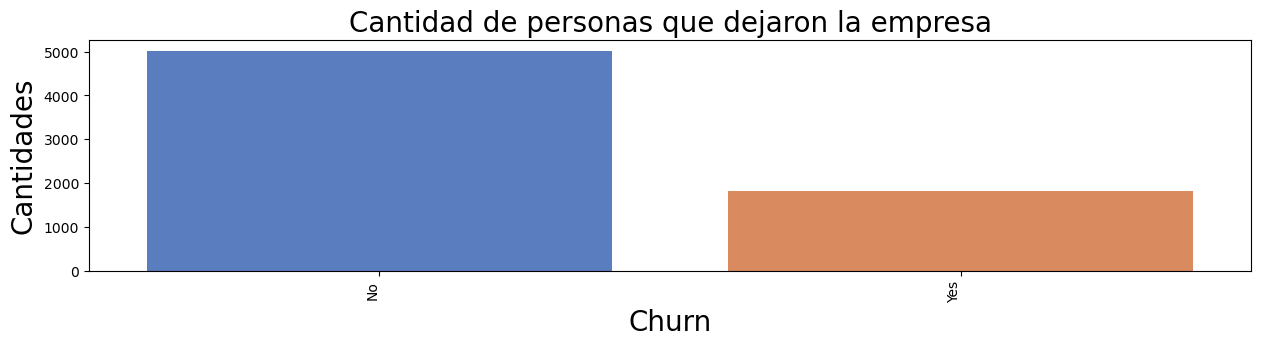

In [39]:
# Distribucion de cuantos valores de 1 y cuantos de 0 existen
plt.figure(figsize=(15,3))
g = sns.countplot(data=telco_df,
                  x="Churn",
                  palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de personas que dejaron la empresa', size = 20)
plt.xlabel("Churn", size = 20)
plt.ylabel("Cantidades", size = 20)
plt.show()

In [40]:
print(telco_df['Churn'].value_counts())

Churn
No     5023
Yes    1819
Name: count, dtype: int64


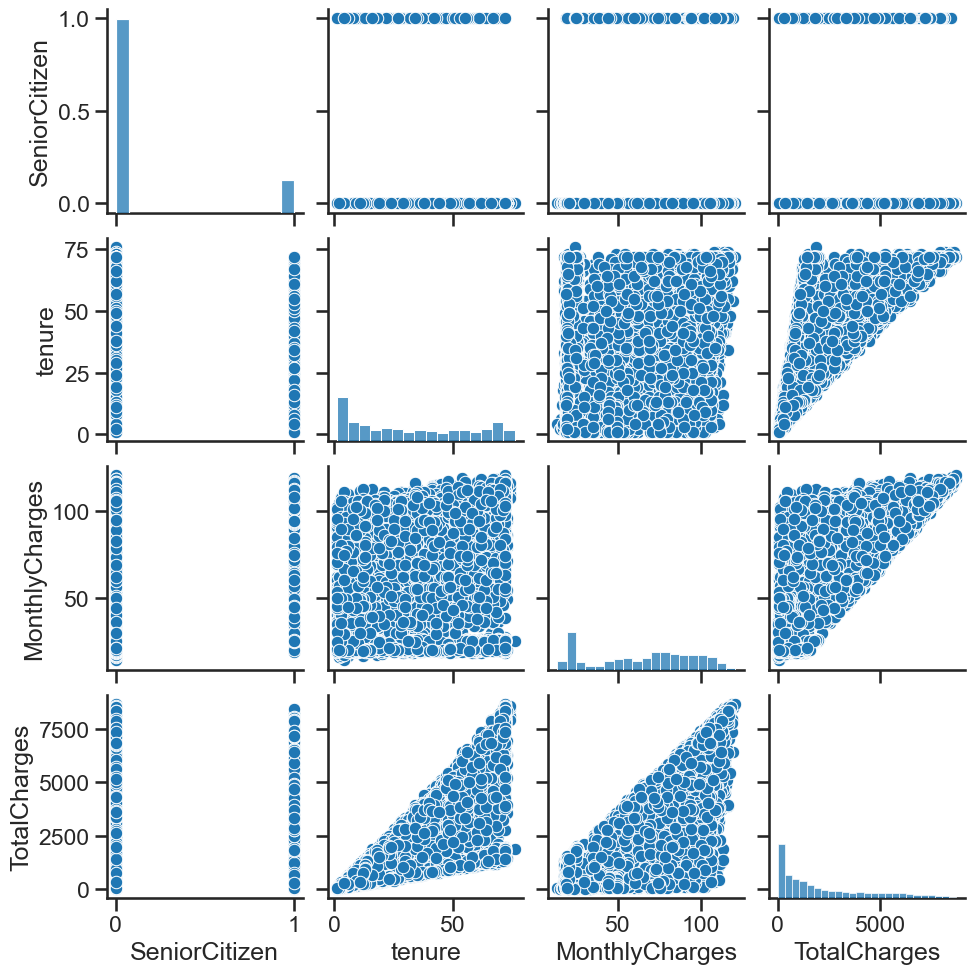

In [41]:
# Así comparamos todas las variables entre si, no hay distribucion de los valores de las variables, todo los graficos son parecidos contra churn
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.pairplot(telco_df)
plt.show()

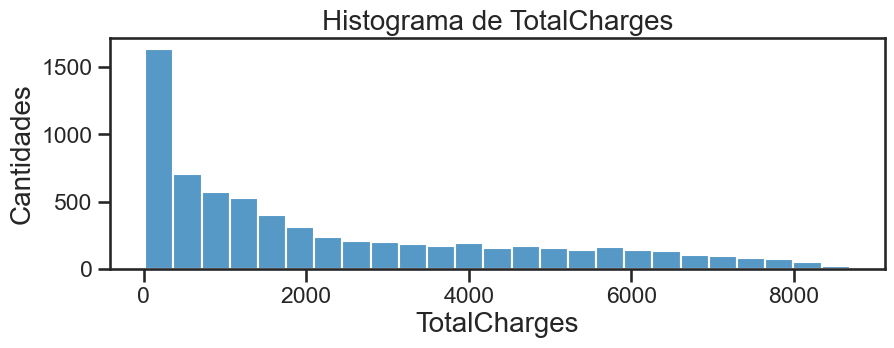

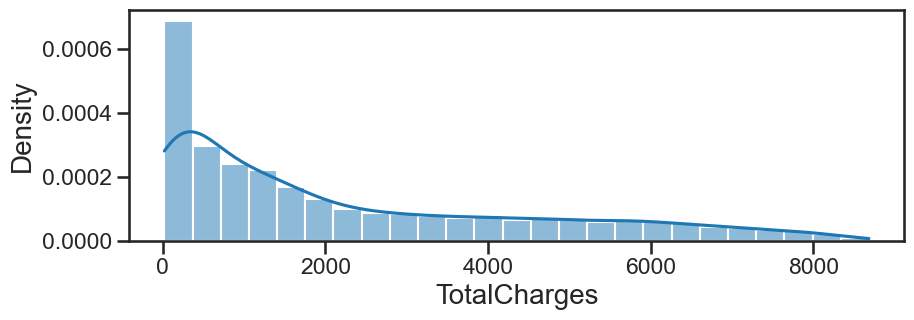

In [42]:
# Histograma tipico, vemos algunos valores aislados en el cero 
plt.figure(figsize=(10,3))
sns.histplot(data=telco_df,
             x='TotalCharges', stat='count', kde=False)
plt.xlabel("TotalCharges",size = 20)
plt.ylabel("Cantidades",size = 20)
plt.title('Histograma de TotalCharges',size = 20)
plt.show()

# Histograma con linea de tendencia, vemos algunos valores aislados en el cero 
plt.figure(figsize=(10,3))
sns.histplot(data=telco_df,
             x='TotalCharges', stat='density', kde=True)
plt.xlabel("TotalCharges",size = 20)
plt.ylabel("Density",size = 20)
plt.show()

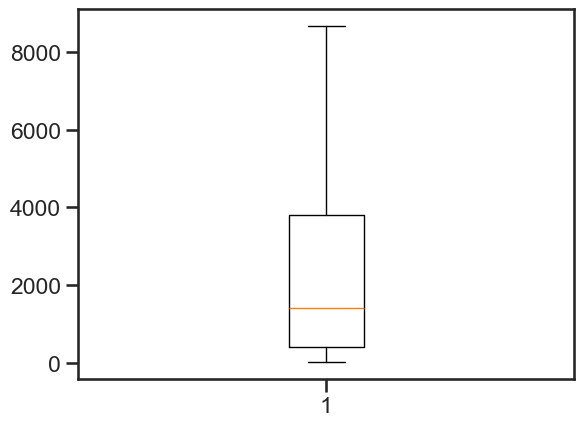

In [43]:
plt.figure()
bxplot = plt.boxplot(telco_df['TotalCharges'])
plt.show()

In [44]:
# Boxplot mostrando los cargos totales (pagados por los clientes hasta el momento), la mediana para cada caso, y si abandonaron o no la empresa.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14024\508196773.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=telco_df,


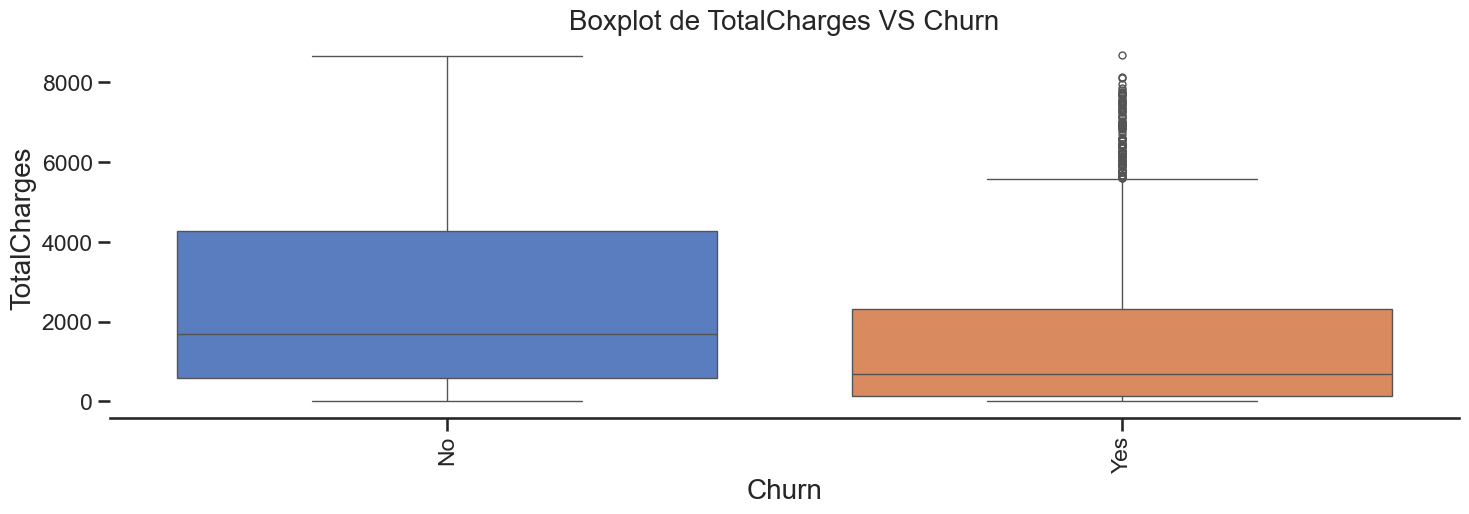

In [45]:
g = sns.catplot(data=telco_df,
                x="Churn",y="TotalCharges", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Churn",size = 20)
plt.ylabel("TotalCharges",size = 20)
plt.title('Boxplot de TotalCharges VS Churn',size = 20)
plt.show()

In [46]:
# Se observa la presencia de muchos valores outliers en "Yes", pero en terminos generales podemos decir que los clientes que abandonan
# la empresa, suelen tener menores cargos totales. Lo cual es lógico ya que al haber pasado menos tiempo siendo clientes, la cuenta acumulada es menor.

# En las próximas lineas, analizaremos mejor esto último que hemos mencionado.

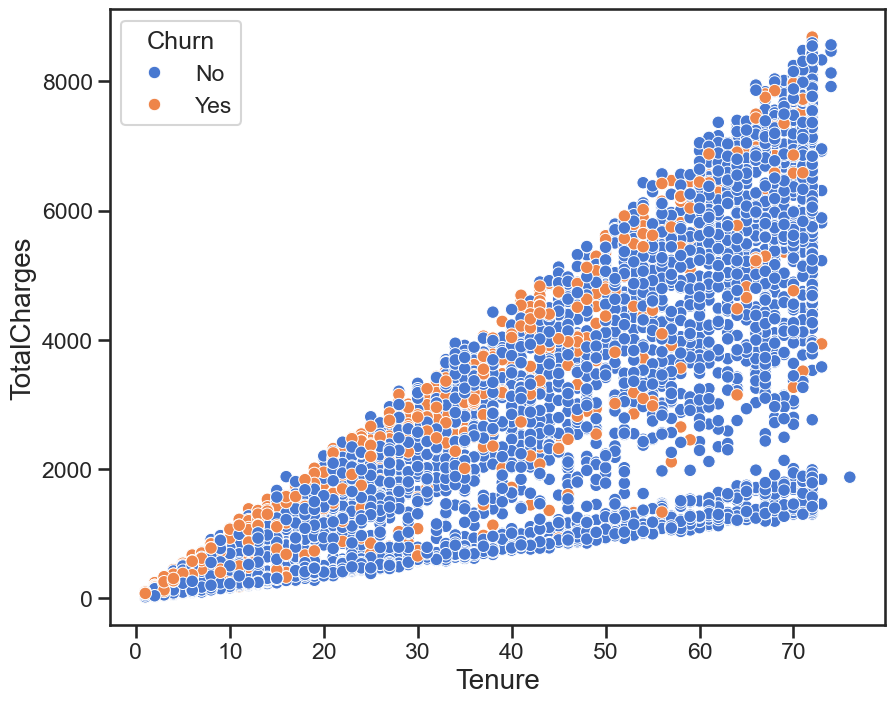

In [47]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=telco_df.tenure,y=telco_df.TotalCharges,
                hue=telco_df.Churn,palette='muted')
plt.xlabel("Tenure",fontsize=20)
plt.ylabel("TotalCharges",fontsize=20)

plt.show()

In [48]:
# Queremos analizar si existen relaciones entre las diferentes features del dataset.

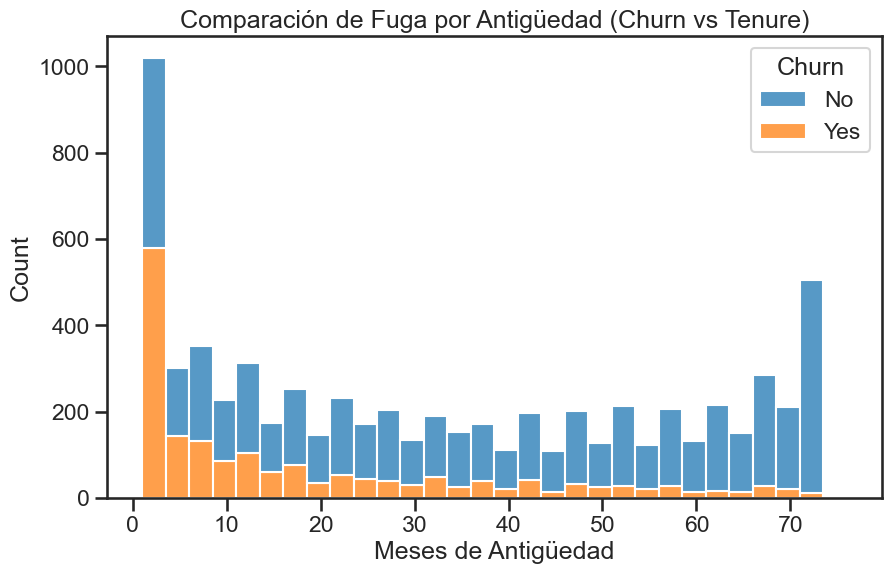

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=telco_df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Comparación de Fuga por Antigüedad (Churn vs Tenure)')
plt.xlabel('Meses de Antigüedad')
plt.show()

In [50]:
# Podemos observar que en los primeros meses siendo clientes, suelen ser más propensos a abandonar la empresa.
# A medida que pasan los meses y aumenta su antigüedad, los clientes son fidelizados y la tasa de Churn (positiva) baja drasticamente.

In [51]:
# Los clientes pueden optar por contratos mensuales, anuales o bianuales
# Queremos averiguar si existe relación entre el tipo de contrato que poseen los clientes y la tasa positiva de Churn.

Churn                  No        Yes
Contract                            
Month-to-month  57.349166  42.650834
One year        88.638262  11.361738
Two year        96.769457   3.230543
Unknown         73.436161  26.563839


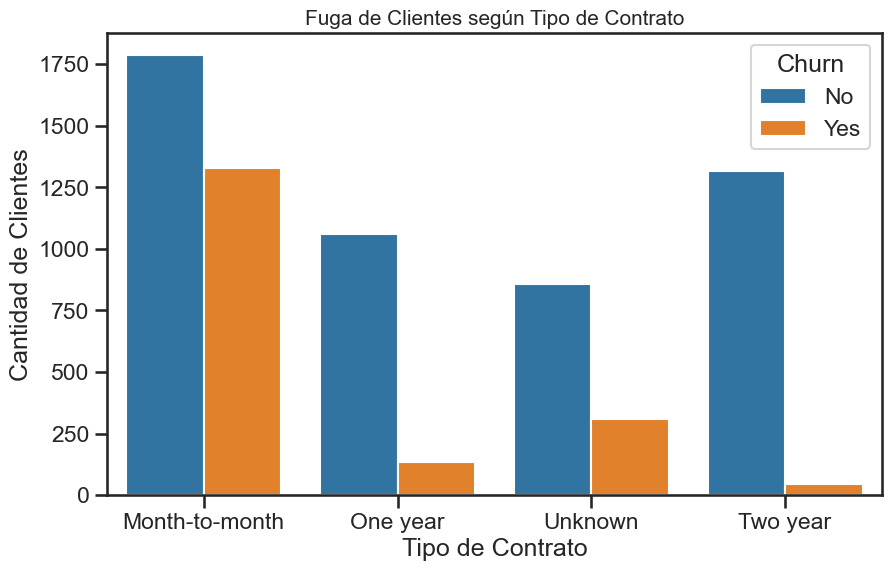

In [52]:
# Tabla de porcentajes
print(pd.crosstab(telco_df['Contract'], telco_df['Churn'], normalize='index') * 100)

# Gráfico
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=telco_df)
plt.title('Fuga de Clientes según Tipo de Contrato', fontsize=15)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.show()

In [53]:
# Se observa que la tasa de Churn positiva es considerablemente mayor cuando los clientes tienen un contrato mes a mes en comparación con
# cuando el contrato es de uno o dos años

In [54]:
# ¿Como es el contexto económico? ¿Existe sensibilidad en los precios?
# Vamos a analizar si existe una correlacion entre la fuga de clientes y los cargos mensuales pagados

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14024\2673989014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_df, ax=axes[0], palette="Set2")


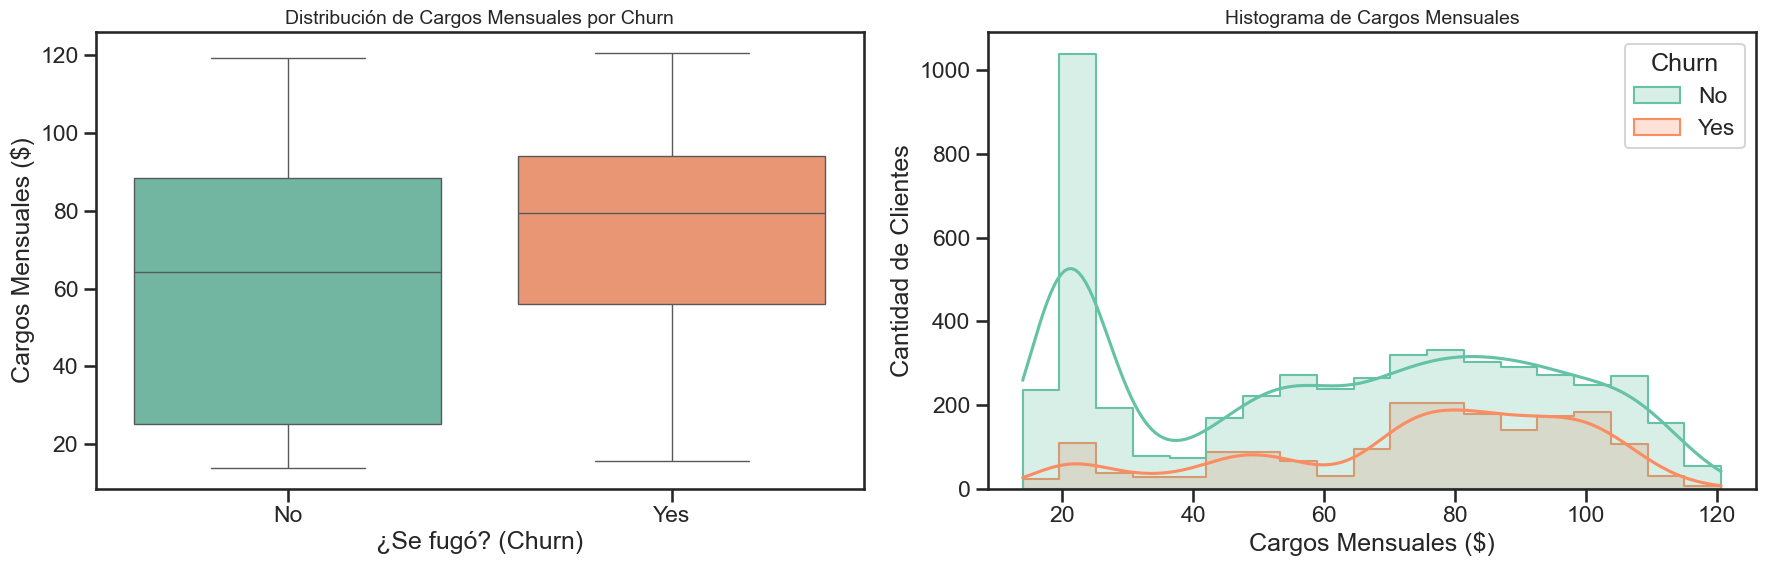

Estadísticas de Cargos Mensuales por Churn:
        count       mean        std     min    25%   50%      75%         max
Churn                                                                        
No     5023.0  61.249438  31.136206  13.925  25.10  64.4  88.3875  119.402817
Yes    1819.0  74.400363  24.800695  15.775  55.95  79.6  94.2250  120.622222


In [55]:
# Creamos dos gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Boxplot 
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_df, ax=axes[0], palette="Set2")
axes[0].set_title('Distribución de Cargos Mensuales por Churn', fontsize=14)
axes[0].set_xlabel('¿Se fugó? (Churn)')
axes[0].set_ylabel('Cargos Mensuales ($)')

# Gráfico 2: Histograma con Curva de Densidad
sns.histplot(data=telco_df, x='MonthlyCharges', hue='Churn', kde=True, element="step", ax=axes[1], palette="Set2")
axes[1].set_title('Histograma de Cargos Mensuales', fontsize=14)
axes[1].set_xlabel('Cargos Mensuales ($)')
axes[1].set_ylabel('Cantidad de Clientes')

plt.tight_layout()
plt.show()

# Imprimimos las estadisticas
print("Estadísticas de Cargos Mensuales por Churn:")
print(telco_df.groupby('Churn')['MonthlyCharges'].describe())

 Encontramos que quienes pagan cargos mensuales más altos tienen una mayor tasa positiva de Churn.
 Este dato por sí solo es util, pero no debemos olvidarnos que quienes tienen cargos mensuales más altos podrian tener multiples servicios contratados

La conclusión que podemos obtener es que los clientes con mayores cargos mensuales, son más exigentes y propensos a abandonar la empresa si sienten que no estan obteniendo el valor esperado.

In [56]:
# Exporto mi DataFrame (ya limpio y adaptado) para poder usar con el modelo

telco_df.to_csv('./telco_churn_clusterai_v1.csv', index=False)